### Variational Quantum Deflation

VQD is a quantum algorithm that uses a variational technique to find the k eigenvalues of the Hamiltonian H of a given system.

The algorithm computes excited state energies of generalized hamiltonians by optimizing over a modified cost function. Each successive eigenvalue is calculated iteratively by introducing an overlap term with all the previously computed eigenstates that must be minimized. This ensures that higher energy eigenstates are found.

In [1]:
from qiskit.quantum_info import SparsePauliOp

H2_op = SparsePauliOp.from_list(
    [
        ("II", -1.052373245772859),
        ("IZ", 0.39793742484318045),
        ("ZI", -0.39793742484318045),
        ("ZZ", -0.01128010425623538),
        ("XX", 0.18093119978423156),
    ]
)

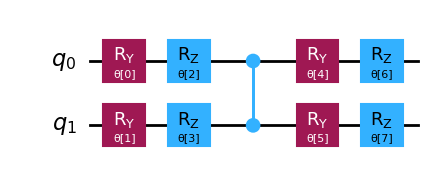

In [2]:
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import SLSQP

ansatz = TwoLocal(2, rotation_blocks=["ry", "rz"], entanglement_blocks="cz", reps=1)

optimizer = SLSQP()
ansatz.decompose().draw("mpl")

In [3]:
from qiskit.primitives import Sampler, Estimator
from qiskit_algorithms.state_fidelities import ComputeUncompute

estimator = Estimator()
sampler = Sampler()
fidelity = ComputeUncompute(sampler)

In [4]:
k = 3
betas = [33, 33, 33]

In [5]:
counts = []
values = []
steps = []


def callback(eval_count, params, value, meta, step):
    counts.append(eval_count)
    values.append(value)
    steps.append(step)

In [6]:
from qiskit_algorithms import VQD

vqd = VQD(estimator, fidelity, ansatz, optimizer, k=k, betas=betas, callback=callback)
result = vqd.compute_eigenvalues(operator=H2_op)
vqd_values = result.eigenvalues

In [7]:
print(vqd_values.real)

[-1.85726425 -1.24458746 -0.88270256]


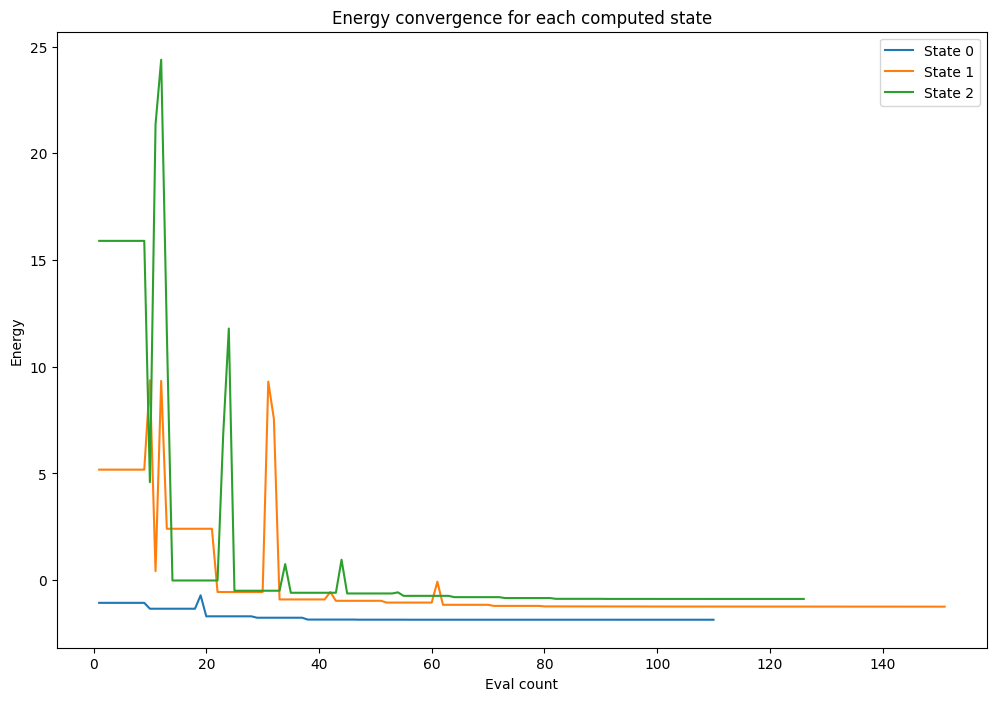

In [8]:
import numpy as np
import pylab

pylab.rcParams["figure.figsize"] = (12, 8)

steps = np.asarray(steps)
counts = np.asarray(counts)
values = np.asarray(values)

for i in range(1, 4):
    _counts = counts[np.where(steps == i)]
    _values = values[np.where(steps == i)]
    pylab.plot(_counts, _values, label=f"State {i-1}")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for each computed state")
pylab.legend(loc="upper right");